<a href="https://colab.research.google.com/github/MK396/SiOC/blob/main/demozaikowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
from skimage import io
from scipy import ndimage

(400, 600, 3)

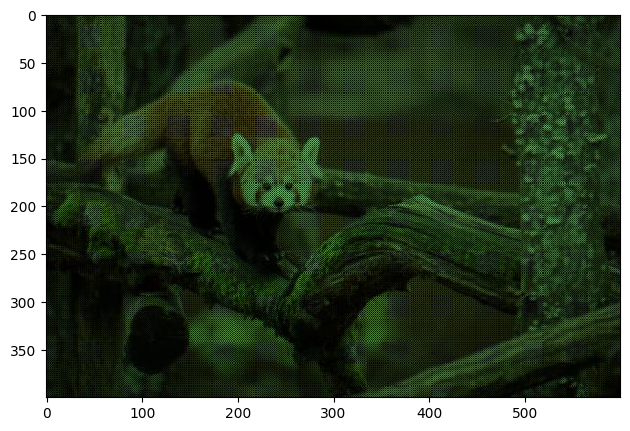

In [69]:
# Wczytanie zmozaikowanego obrazu, który jest w masce Bayera
obraz_bayer = io.imread("/content/drive/MyDrive/CFA/Bayer/panda.jpg")
_ = io.imshow(obraz_bayer)
obraz_bayer.shape

In [67]:
# Stworzenie maski konwolucji o wzmocnianiach dla kanałów R, G, B
maska_konwolucji = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])

(400, 600, 3)

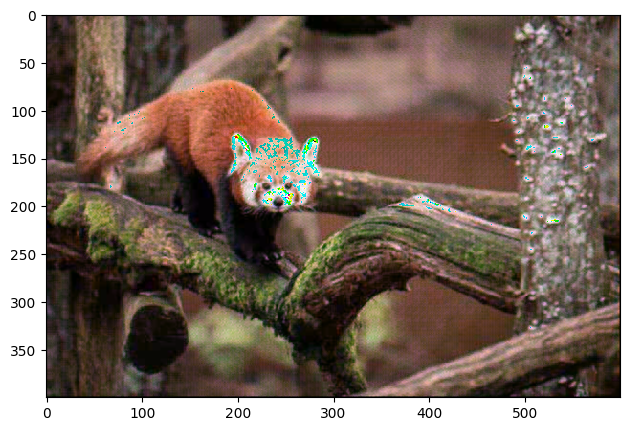

In [70]:
# Wykorzystanie konwolucji 2D do przeprowadzenia demozaikowania na każdym kanale koloru
obraz_demozaikowany = np.dstack([
    ndimage.convolve(obraz_bayer[:, :, channel], maska_konwolucji[:, :, channel], mode="constant", cval=0.0)
    for channel in range(3)
])
_ = io.imshow(obraz_demozaikowany)
obraz_demozaikowany.shape